## Cross validation for parameter tuning, model selection and feature selection
   - Split the data into K equal partitions (or 'folds')
   - Use fold 1 as the testing set and the union of other as the training set 
   - Calculate the testing accuracy
   - Repeat the first two steps K times, using different fold as the testing set each time.
   - Use the average testing accuracy as the estimate of out-of-sample accuracy 

In [1]:
# Selecting the best tuning parameter (aka 'hyperparameters') for KNN on the iris dataset
# 10-fold cross validation with K=5 for KNN(the n_neighbour parameter)

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# Read iris data
iris=load_iris()

# Create X(feature) and y(response)
X=iris.data
y=iris.target

# Use train/test split with different random state values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4)

# Check classification accuracy of KNN=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9736842105263158


In [2]:
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [3]:
# Use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


In [5]:
# Search for an optimal value of K for KNN
k_range = range (1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print (k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross-validation Accuracy')

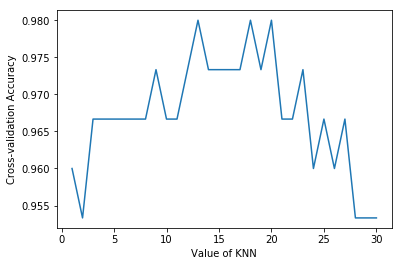

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the value of K for KNN (x-axis) versus the cross-validation accuracy (y-axis)
plt.plot(k_range,k_scores)
plt.xlabel('Value of KNN')
plt.ylabel('Cross-validation Accuracy')

## Cross validation example: model selection
   - Compare the best KNN model with logistic regression on the iris dataset

In [8]:
# 10 fold cross-validation with the best KNN model
knn=KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean())

0.9800000000000001


In [9]:
# 10 fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean())

0.9533333333333334


## Cross validation example:Feature selection
   - Should 'newspaper' feature be included in the linear model on the advertising data set

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [13]:
# Read in the advertising dataset
data=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)

In [14]:
# Create a Python list of three feature names
feature_cols=['TV','radio','newspaper']

# Use the list to select a subset of the DataFrame(X)
X=data[feature_cols]

# Select the 'sales' column as response (y)
y=data.sales

In [15]:
# 10 fold cross-validation with all three features
lm=LinearRegression()
scores=cross_val_score(lm,X,y,cv=10,scoring="mean_squared_error")

In [16]:
# Fix the sign of MSE scores
mse_scores=-scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [17]:
# Convert the MSE to RMSE
rmse_scores= np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [18]:
# Calculate the average RMSE
print(rmse_scores.mean())

1.6913531708051797


In [19]:
# 10 fold cross-validation with two features (excluding 'newspaper')
feature_cols=['TV','radio']
X=data[feature_cols]
y=data.sales
print(np.sqrt(-cross_val_score(lm,X,y,cv=10,scoring="mean_squared_error")).mean())

1.6796748419090766


In [ ]:
# There is a reduction in RMSE when we exclude 'newspaper' form the model. Model excluding 'newspaper' is a better model

## More efficient paramater tuning using GridSearchCV
   - Allows you to define a grid of parameters that will be searched using K-fold cross-validation

In [47]:
# Read iris data
iris=load_iris()

# Create X(feature) and y(response)
X=iris.data
y=iris.target

from sklearn.grid_search import GridSearchCV

# Define the parameter values that should be searched 
k_range= list(range(1,31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [48]:
# Create a parameter grid: map the parameter names to the value that should be searched
param_grid=dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [49]:
# Instantiate the grid
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')

In [50]:
# Fit the grid with data
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [51]:
# View the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [52]:
# Examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.86666667 1.         1.         1.        ]
0.96


In [54]:
# Create a list of the mean scores only
grid_mean_scores=[result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross Validation Accuracy')

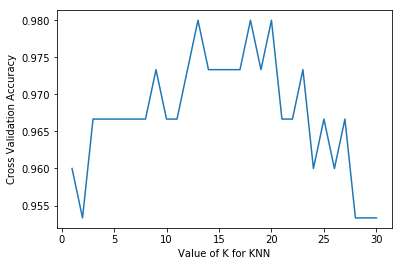

In [55]:
# Plot the results
plt.plot(k_range,grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validation Accuracy')

In [57]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
